# CNN_10channel

Abstract:
- single channel: band_avg
- CNN, small net

Result:
- Kaggle score: 

References:
- https://www.kaggle.com/ivalmian/simple-svd-xgboost-baseline-lb-35
- https://www.kaggle.com/arieltci/a-keras-prototype-0-21174-on-pl

## 1. Preprocess

### Import pkgs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss, accuracy_score
from IPython.display import display

%matplotlib inline

In [2]:
import os
import time
import zipfile
import lzma
import pickle
from PIL import Image
from shutil import copy2

### Run name

In [3]:
project_name = 'SC_Iceberg_Classifier'
step_name = 'CNN_4channel'
date_str = time.strftime("%Y%m%d", time.localtime())
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)

run_name: SC_Iceberg_Classifier_CNN_4channel_20171111_190201


### Basic folders

In [4]:
cwd = os.getcwd()
input_path = os.path.join(cwd, 'input')
log_path = os.path.join(cwd, 'log')
model_path = os.path.join(cwd, 'model')
output_path = os.path.join(cwd, 'output')
print('input_path: ' + input_path)
print('log_path: ' + log_path)
print('model_path: ' + model_path)
print('output_path: ' + output_path)

input_path: E:\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\input
log_path: E:\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\log
model_path: E:\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\model
output_path: E:\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\output


### Load data

In [5]:
sample_submission_path = os.path.join(input_path, 'sample_submission.csv')
sample_submission = pd.read_csv(sample_submission_path)
print(sample_submission.shape)
sample_submission.head(2)

(8424, 2)


,id,is_iceberg
0,5941774d,0.5
1,4023181e,0.5


In [6]:
is_iceberg_path = os.path.join(input_path, 'is_iceberg.p')

y_data = pickle.load(open(is_iceberg_path, mode='rb'))

print(y_data.shape)

(1604,)


In [7]:
%%time
#Load orignal data
inc_angle_data_path = os.path.join(input_path, 'inc_angle_data.p')
inc_angle_test_path = os.path.join(input_path, 'inc_angle_test.p')

inc_angle_data = pickle.load(open(inc_angle_data_path, mode='rb'))
inc_angle_test = pickle.load(open(inc_angle_test_path, mode='rb'))

print(inc_angle_data.shape)
print(inc_angle_test.shape)

(1604,)
(8424,)
Wall time: 0 ns


In [8]:
%%time
#Load orignal data
band1_data_path = os.path.join(input_path, 'band1_data.p')
band2_data_path = os.path.join(input_path, 'band2_data.p')
band_avg_data_path = os.path.join(input_path, 'band_avg_data.p')
band1_test_path = os.path.join(input_path, 'band1_test.p')
band2_test_path = os.path.join(input_path, 'band2_test.p')
band_avg_test_path = os.path.join(input_path, 'band_avg_test.p')

band1_data = pickle.load(open(band1_data_path, mode='rb'))
band2_data = pickle.load(open(band2_data_path, mode='rb'))
band_avg_data = pickle.load(open(band_avg_data_path, mode='rb'))
band1_test = pickle.load(open(band1_test_path, mode='rb'))
band2_test = pickle.load(open(band2_test_path, mode='rb'))
band_avg_test = pickle.load(open(band_avg_test_path, mode='rb'))

print(band1_data.shape)
print(band2_data.shape)
print(band_avg_data.shape)
print(band1_test.shape)
print(band2_test.shape)
print(band_avg_test.shape)

(1604, 75, 75)
(1604, 75, 75)
(1604, 75, 75)
(8424, 75, 75)
(8424, 75, 75)
(8424, 75, 75)
Wall time: 2.22 s


In [9]:
%%time
#Load orignal data
band1_data_edges_path = os.path.join(input_path, 'band1_data_edges.p')
band2_data_edges_path = os.path.join(input_path, 'band2_data_edges.p')
band_avg_data_edges_path = os.path.join(input_path, 'band_avg_data_edges.p')
band1_test_edges_path = os.path.join(input_path, 'band1_test_edges.p')
band2_test_edges_path = os.path.join(input_path, 'band2_test_edges.p')
band_avg_test_edges_path = os.path.join(input_path, 'band_avg_test_edges.p')

band1_data_edges = pickle.load(open(band1_data_edges_path, mode='rb'))
band2_data_edges = pickle.load(open(band2_data_edges_path, mode='rb'))
band_avg_data_edges = pickle.load(open(band_avg_data_edges_path, mode='rb'))
band1_test_edges = pickle.load(open(band1_test_edges_path, mode='rb'))
band2_test_edges = pickle.load(open(band2_test_edges_path, mode='rb'))
band_avg_test_edges = pickle.load(open(band_avg_test_edges_path, mode='rb'))

print(band1_data_edges.shape)
print(band2_data_edges.shape)
print(band_avg_data_edges.shape)
print(band1_test_edges.shape)
print(band2_test_edges.shape)
print(band_avg_test_edges.shape)

(1604, 75, 75)
(1604, 75, 75)
(1604, 75, 75)
(8424, 75, 75)
(8424, 75, 75)
(8424, 75, 75)
Wall time: 2.17 s


In [10]:
%%time
#Load orignal data
band1_data_gabor_path = os.path.join(input_path, 'band1_data_gabor.p')
band2_data_gabor_path = os.path.join(input_path, 'band2_data_gabor.p')
band_avg_data_gabor_path = os.path.join(input_path, 'band_avg_data_gabor.p')
band1_test_gabor_path = os.path.join(input_path, 'band1_test_gabor.p')
band2_test_gabor_path = os.path.join(input_path, 'band2_test_gabor.p')
band_avg_test_gabor_path = os.path.join(input_path, 'band_avg_test_gabor.p')

band1_data_gabor = pickle.load(open(band1_data_gabor_path, mode='rb'))
band2_data_gabor = pickle.load(open(band2_data_gabor_path, mode='rb'))
band_avg_data_gabor = pickle.load(open(band_avg_data_gabor_path, mode='rb'))
band1_test_gabor = pickle.load(open(band1_test_gabor_path, mode='rb'))
band2_test_gabor = pickle.load(open(band2_test_gabor_path, mode='rb'))
band_avg_test_gabor = pickle.load(open(band_avg_test_gabor_path, mode='rb'))

print(band1_data_gabor.shape)
print(band2_data_gabor.shape)
print(band_avg_data_gabor.shape)
print(band1_test_gabor.shape)
print(band2_test_gabor.shape)
print(band_avg_test_gabor.shape)

(1604, 75, 75)
(1604, 75, 75)
(1604, 75, 75)
(8424, 75, 75)
(8424, 75, 75)
(8424, 75, 75)
Wall time: 2.56 s


In [11]:
%%time
x_data = np.concatenate([band1_data[:, :, :, np.newaxis],
                         band2_data[:, :, :, np.newaxis],
                         band_avg_data[:, :, :, np.newaxis],
                         band1_data_edges[:, :, :, np.newaxis],
                         band2_data_edges[:, :, :, np.newaxis],
                         band_avg_data_edges[:, :, :, np.newaxis],
                         band1_data_gabor[:, :, :, np.newaxis],
                         band2_data_gabor[:, :, :, np.newaxis],
                         band_avg_data_gabor[:, :, :, np.newaxis]], axis=-1)
print(x_data.shape)
x_test = np.concatenate([band1_test[:, :, :, np.newaxis],
                         band2_test[:, :, :, np.newaxis],
                         band_avg_test[:, :, :, np.newaxis],
                         band1_test_edges[:, :, :, np.newaxis],
                         band2_test_edges[:, :, :, np.newaxis],
                         band_avg_test_edges[:, :, :, np.newaxis],
                         band1_test_gabor[:, :, :, np.newaxis],
                         band2_test_gabor[:, :, :, np.newaxis],
                         band_avg_test_gabor[:, :, :, np.newaxis]], axis=-1)
print(x_test.shape)

(1604, 75, 75, 9)
(8424, 75, 75, 9)
Wall time: 8.33 s


In [12]:
%%time
x_train, x_val, inc_angle_train, inc_angle_val, y_train, y_val = train_test_split(x_data, inc_angle_data, y_data, test_size=0.15, shuffle=True, random_state=31)
print(x_train.shape)
print(x_val.shape)
print(inc_angle_train.shape)
print(inc_angle_val.shape)
print(y_train.shape)
print(y_val.shape)

(1363, 75, 75, 9)
(241, 75, 75, 9)
(1363,)
(241,)
(1363,)
(241,)
Wall time: 484 ms


## 2. Build model

In [13]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization, Input
from keras.layers.merge import Concatenate
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

Using TensorFlow backend.


In [14]:
def build_model():
    bn_model = 0
    p_activation = "relu"
    input_1 = Input(shape=(75, 75, 9), name="bands")
    input_2 = Input(shape=[1], name="angle")
    
    img_1 = Conv2D(64, kernel_size = (3,3), activation=p_activation)(input_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = Conv2D(64, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    
    img_1 = Conv2D(128, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = Conv2D(128, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)
    
    img_1 = Conv2D(256, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = Conv2D(256, kernel_size = (3,3), activation=p_activation) (img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = MaxPooling2D((2,2)) (img_1)
    img_1 = Dropout(0.2)(img_1)

    img_1 = GlobalMaxPooling2D() (img_1)
    
#     img_2 = Conv2D(128, kernel_size = (3,3), activation=p_activation)(input_1)
#     img_2 = BatchNormalization()(img_2)
#     img_2 = MaxPooling2D((2,2)) (img_2)
#     img_2 = Dropout(0.2)(img_2)
#     img_2 = GlobalMaxPooling2D() (img_2)
    
    angle = BatchNormalization()(input_2)
    img_concat = (Concatenate()([img_1, angle]))
    
#     img_concat = Concatenate([img_1, input_2])
    
    dense_ayer = Dense(2048, activation=p_activation)(img_concat)
    dense_ayer = BatchNormalization()(dense_ayer)
    dense_ayer = Dropout(0.5)(dense_ayer)
    dense_ayer = Dense(2048, activation=p_activation)(dense_ayer)
    dense_ayer = Dropout(0.5)(dense_ayer)
    dense_ayer = Dense(128, activation=p_activation)(dense_ayer)
    dense_ayer = Dropout(0.5)(dense_ayer)
    output = Dense(1, activation="sigmoid")(dense_ayer)
    
    model = Model([input_1,input_2],  output)
#     optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = Adam(lr=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [15]:
# def build_model():
#     model = Sequential()

#     model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',
#                      input_shape = (75, 75, 3)))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D(strides=(2,2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D(strides=(2,2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D(strides=(2,2)))
#     model.add(Dropout(0.25))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(Dense(1024, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(units = 1, activation = 'sigmoid'))

#     model.compile(optimizer = Adam(lr=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return model

In [16]:
model = build_model()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
bands (InputLayer)               (None, 75, 75, 9)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 73, 73, 64)    5248        bands[0][0]                      
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 73, 73, 64)    256         conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 71, 71, 64)    36928       batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [17]:
def saveModel(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
saveModel(model, 'saveModel_test')

In [18]:
def get_lr(x):
    lr = round(1e-3 * 0.9 ** x, 6)
    if lr < 5e-5:
        lr = 5e-5
    print(lr, end='  ')
    return lr

# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
annealer = LearningRateScheduler(get_lr)

log_dir = os.path.join(log_path, run_name)
print('log_dir:' + log_dir)
tensorBoard = TensorBoard(log_dir=log_dir)

log_dir:E:\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\log\SC_Iceberg_Classifier_CNN_4channel_20171111_190201


In [19]:
%%time
hist = model.fit([x_train, inc_angle_train], y_train, 
                 batch_size = 8, 
                 verbose= 1,
                 epochs = 100, #1 for ETA, 0 for silent
                 validation_data=([x_val, inc_angle_val], y_val),
                 callbacks=[tensorBoard])

Train on 1363 samples, validate on 241 samples
Epoch 1/100
1363/1363 [==============================] - 9s - loss: 0.7792 - acc: 0.6163 - val_loss: 0.8889 - val_acc: 0.4357
Epoch 2/100
1363/1363 [==============================] - 7s - loss: 0.6632 - acc: 0.6867 - val_loss: 0.9189 - val_acc: 0.4398
Epoch 3/100
1363/1363 [==============================] - 7s - loss: 0.6104 - acc: 0.6948 - val_loss: 0.7279 - val_acc: 0.5519
Epoch 4/100
1363/1363 [==============================] - 7s - loss: 0.5218 - acc: 0.7469 - val_loss: 0.5494 - val_acc: 0.6971
Epoch 5/100
1363/1363 [==============================] - 7s - loss: 0.4890 - acc: 0.7755 - val_loss: 0.4729 - val_acc: 0.7552
Epoch 6/100
1363/1363 [==============================] - 7s - loss: 0.4374 - acc: 0.8026 - val_loss: 0.4889 - val_acc: 0.7718
Epoch 7/100
1363/1363 [==============================] - 7s - loss: 0.4217 - acc: 0.7960 - val_loss: 0.5349 - val_acc: 0.7344
Epoch 8/100
1363/1363 [==============================] - 7s - loss: 0.4

1363/1363 [==============================] - 7s - loss: 0.0736 - acc: 0.9729 - val_loss: 0.8019 - val_acc: 0.8133
Epoch 66/100
1363/1363 [==============================] - 7s - loss: 0.1188 - acc: 0.9596 - val_loss: 0.4892 - val_acc: 0.8299
Epoch 67/100
1363/1363 [==============================] - 8s - loss: 0.0920 - acc: 0.9655 - val_loss: 0.3877 - val_acc: 0.8921
Epoch 68/100
1363/1363 [==============================] - 8s - loss: 0.1077 - acc: 0.9604 - val_loss: 0.3783 - val_acc: 0.8963
Epoch 69/100
1363/1363 [==============================] - 7s - loss: 0.0872 - acc: 0.9721 - val_loss: 0.3647 - val_acc: 0.8880
Epoch 70/100
1363/1363 [==============================] - 6s - loss: 0.0501 - acc: 0.9787 - val_loss: 0.5817 - val_acc: 0.8714
Epoch 71/100
1363/1363 [==============================] - 7s - loss: 0.0816 - acc: 0.9685 - val_loss: 0.4044 - val_acc: 0.8921
Epoch 72/100
1363/1363 [==============================] - 7s - loss: 0.0633 - acc: 0.9765 - val_loss: 0.4167 - val_acc: 0.88

In [20]:
final_loss, final_acc = model.evaluate([x_val, inc_angle_val], y_val, verbose=1)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

241/241 [==============================] - 0s     
Final loss: 0.5268, final accuracy: 0.8714


In [21]:
val_prob1 = model.predict([x_val, inc_angle_val])

# print('Val log_loss: {}'.format(log_loss(y_val, val_prob1)))
val_prob1_limit = np.clip(val_prob1, 0.00005, 0.99995)
loss = log_loss(y_val, val_prob1_limit)
print('Val log_loss: {}'.format(loss))

val_prob1_limit = np.clip(val_prob1_limit, 0.05, 0.95)
loss = log_loss(y_val, val_prob1_limit)
print('Val log_loss: {}'.format(loss))

Val log_loss: 0.4903107398095621
Val log_loss: 0.3523237080896791


In [22]:
final_acc_str = str(int(loss*10000))
run_name_acc = project_name + '_' + step_name + '_' + time_str + '_' + final_acc_str
print(run_name_acc)

SC_Iceberg_Classifier_CNN_4channel_20171111_190201_3523


In [23]:
histories = pd.DataFrame(hist.history)
histories['epoch'] = hist.epoch
print(histories.columns)
histories_file = os.path.join(model_path, run_name_acc + '.csv')
histories.to_csv(histories_file, index=False)

Index(['acc', 'loss', 'val_acc', 'val_loss', 'epoch'], dtype='object')


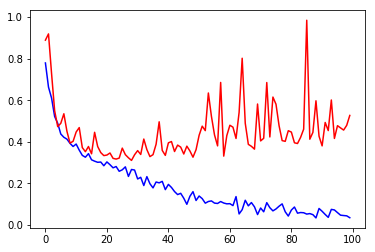

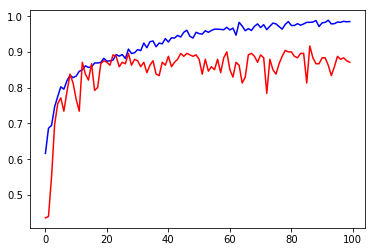

In [24]:
plt.plot(histories['loss'], color='b')
plt.plot(histories['val_loss'], color='r')
plt.show()
plt.plot(histories['acc'], color='b')
plt.plot(histories['val_acc'], color='r')
plt.show()

In [25]:
saveModel(model, run_name_acc)

## 3. Predict

In [26]:
if not os.path.exists(output_path):
    os.mkdir(output_path)
pred_file = os.path.join(output_path, run_name_acc + '.csv')
print(pred_file)

E:\Kaggle\Statoil_C_CORE_Iceberg_Classifier_Challenge\output\SC_Iceberg_Classifier_CNN_4channel_20171111_190201_3523.csv


In [27]:
test_prob = model.predict([x_test, inc_angle_test])
print(test_prob.shape)
print(test_prob[0:2])
test_prob = np.clip(test_prob, 0.05, 0.95)
print(test_prob.shape)
print(test_prob[0:2])

(8424, 1)
[[  1.61323333e-05]
 [  2.24711254e-01]]
(8424, 1)
[[ 0.05      ]
 [ 0.22471125]]


In [28]:
sample_submission['is_iceberg'] = test_prob
print(sample_submission[0:2])
print(sample_submission.shape)
sample_submission.to_csv(pred_file, index=False)

         id  is_iceberg
0  5941774d    0.050000
1  4023181e    0.224711
(8424, 2)


In [29]:
print(run_name_acc)
print('Done!')

SC_Iceberg_Classifier_CNN_4channel_20171111_190201_3523
Done!
